In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import toeplitz, circulant
from matplotlib import pyplot as plt
import config
import models
import tasks
import networks
import plots
import argparse
import json
import time
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import os
import numpy as np
import pathlib
from sklearn.manifold import TSNE

ModuleNotFoundError: No module named 'config'

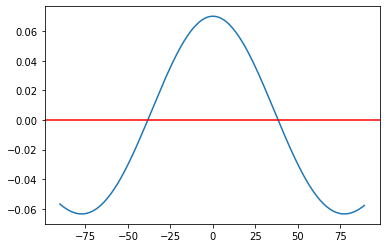

In [22]:
N = np.arange(-90, 90, 1)
s1, s2 = 50, 60
w = np.exp(-N**2/2/s1**2)-np.exp(-N**2/2/s2**2)+0.07
plt.plot(N, w)
plt.axhline(y = 0, color = 'r', linestyle = '-')

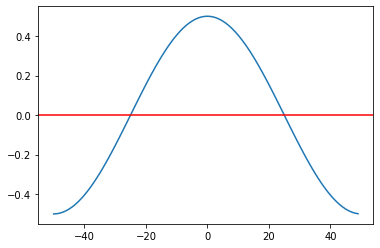

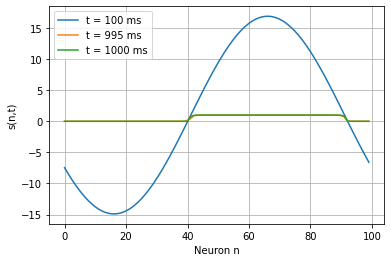

In [113]:
N = 100
x = np.arange(-N/2,N/2)
tau = 20
dt = 1
alpha = 0.5
sigma1 = 70
sigma2 = 90
b = 1
W = alpha * ( np.cos(x / N * np.pi*2))
#W = np.exp(-x**2/2/sigma1**2)-np.exp(-x**2/2/sigma2**2)+0.07

def retanh(x):
    return np.maximum(np.tanh(x), 0)

plt.plot(x, W)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

W = toeplitz(np.roll(W, N//2))
Time = np.arange(0, 1000, dt)
st = np.random.randn(N) #np.zeros((N,1))
s_xt = np.zeros((N,1000))
s_xt[:, 0] = st
for t in Time:
    if t == 0: continue
    s_xt[:, t] = s_xt[:, t-1] + dt/tau * (-s_xt[:, t-1] + W@retanh(s_xt[:, t-1])+b)
    
plt.plot((s_xt[:,-1]), label='t = 100 ms')
plt.plot(retanh(s_xt[:,25]), label='t = 995 ms')
plt.plot(retanh(s_xt[:,-1]), label='t = 1000 ms')
plt.xlabel('Neuron n')
plt.ylabel('s(n,t)')
plt.grid()
plt.legend()
plt.show()

In [3]:
import torch
def weight(pref1, pref2):
    return 0.3 * ( np.cos((pref1-pref2)/180 * np.pi))

In [4]:
R1_N = 10
R1_pref = torch.arange(R1_N) * 180 / R1_N
R1_W = torch.zeros(R1_N, R1_N)
for i in range(R1_N):
    for j in range(R1_N):
        R1_W[i, j] = weight(R1_pref[i], R1_pref[j])

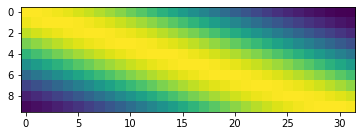

In [5]:
IN_N = 32
IN_pref = torch.arange(IN_N) * 180 / IN_N
IN_R1_W = torch.zeros(R1_N, IN_N)
for i in range(R1_N):
    for j in range(IN_N):
        IN_R1_W[i, j] = weight(R1_pref[i], IN_pref[j])
plt.imshow(IN_R1_W)

In [6]:
noise_amplitude = 0.1 #*0
dim_recurrent = 100
simple_input = False
simple_output = True
hold_zero=False
redo_preanalysis = True # None = redo only if necessary

ORI_RES = 3

hold_orientation_for = 10
hold_cue_for = 100
delay0_set = torch.tensor([0]) 
delay0_set = torch.arange(30, 50)
delay1_set = torch.arange(30, 50)
delay2_set = torch.arange(30, 50)
delay0, delay1, delay2 = 40, 40, 40

total_time = hold_orientation_for*2+hold_cue_for+delay0+delay1+delay2

orientation_neurons = 32
task = tasks.TWO_ORIENTATIONS_DOUBLE_OUTPUT(orientation_neurons, hold_orientation_for, hold_cue_for, delay0_set, delay1_set, delay2_set,
                                        simple_input=simple_input, simple_output=simple_output)
model = models.CTRNN(task=task, dim_recurrent=dim_recurrent, nonlinearity="retanh")

NameError: name 'tasks' is not defined